In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
payments = pd.read_csv('olist_order_payments_dataset.csv')
payments = payments.drop(payments.columns[[1,2,3]], axis=1)
payments = payments.groupby('order_id').sum().reset_index()
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
reviews = reviews.drop(reviews.columns[[0,3,4,5,6]], axis=1)
orders = pd.read_csv('olist_orders_dataset.csv')
orders = orders.drop(orders.columns[[1,2,4,5,7]], axis=1)

In [3]:
score = pd.merge(orders, reviews, on='order_id', how='inner')
score = pd.merge(score, payments, on='order_id', how='inner')
score['order_purchase_timestamp'] = pd.to_datetime(score['order_purchase_timestamp'])
score['order_delivered_customer_date'] = pd.to_datetime(score['order_delivered_customer_date'])
score['deliver_time'] = (score['order_delivered_customer_date'] - score['order_purchase_timestamp']).dt.days
score = score.drop(score.columns[[0,1,2]], axis=1)
score.dropna(inplace=True)
score.head(10)


,review_score,payment_value,deliver_time
0,4,38.71,8.0
1,4,141.46,13.0
2,5,179.12,9.0
3,5,72.20,13.0
4,5,28.62,2.0
5,4,175.26,16.0
7,5,75.16,9.0
8,1,35.95,9.0
9,5,169.76,18.0
10,1,259.06,12.0


In [50]:
score.to_csv('score.csv', index=False)

In [4]:
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
customers = customers.drop(customers.columns[[2,3,4]], axis=1)
orders = orders.drop(orders.columns[[2,3,4,5,6,7]], axis=1)
reviews = reviews.drop(reviews.columns[[0,3,4,5,6]], axis=1)

In [9]:
data1 = pd.merge(orders, customers, on='customer_id')
score_reorder = pd.merge(data1, reviews, on='order_id')
score_reorder.dropna(inplace=True)
score_reorder = score_reorder.drop(score_reorder.columns[[0,1]], axis=1)
score_reorder= score_reorder.assign(count=1)
score_reorder = score_reorder.groupby('customer_unique_id').agg({'review_score': 'mean', 'count': 'sum'}).reset_index()
score_reorder = score_reorder.drop(score_reorder.columns[[0]], axis=1)
# score_reorder.sort_values(by='count', ascending=False)
score_reorder

,review_score,count
0,5.0,1
1,4.0,1
2,3.0,1
3,4.0,1
4,5.0,1
...,...,...
95375,5.0,1
95376,4.0,1
95377,5.0,1
95378,5.0,1


In [102]:
# score_reorder.to_csv('score_reorder.csv', index=False)

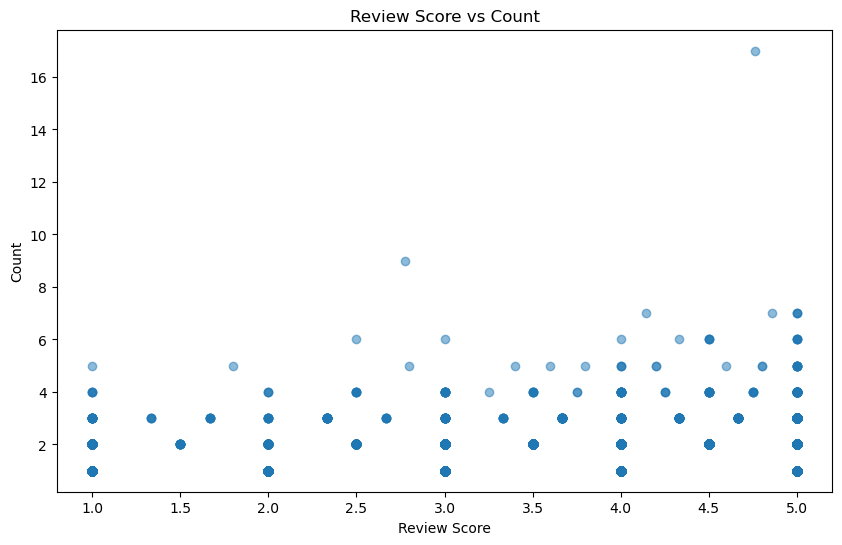

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(score_reorder['review_score'], score_reorder['count'], alpha=0.5)
plt.title('Review Score vs Count')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.grid(False)
plt.show()


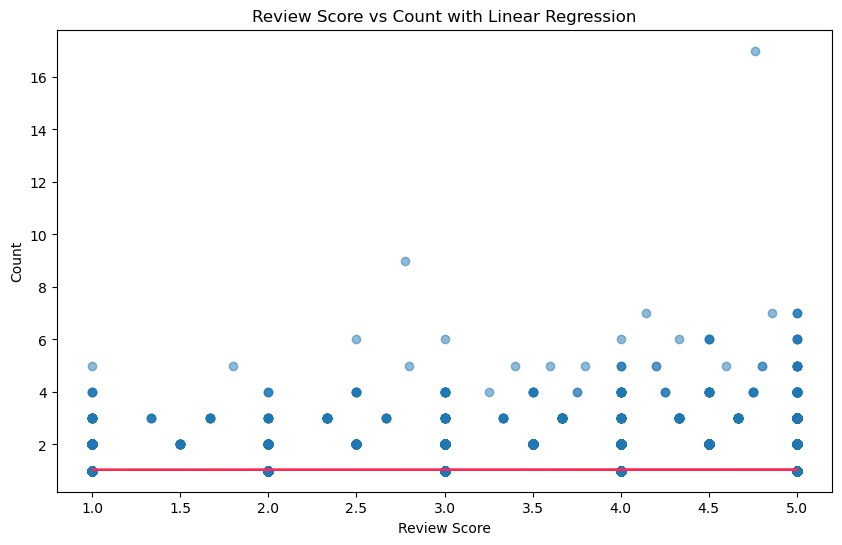

In [111]:
review_score = score_reorder['review_score']
count = score_reorder['count']

# 计算线性回归的参数
coefficients = np.polyfit(review_score, count, 1)
poly = np.poly1d(coefficients)

# 绘制散点图和拟合直线
plt.figure(figsize=(10, 6))
plt.scatter(review_score, count, alpha=0.5)
plt.plot(review_score, poly(review_score), color='#fa2a55')
plt.title('Review Score vs Count with Linear Regression')
plt.xlabel('Review Score')
plt.ylabel('Count')

plt.grid(False)
plt.show()
# y = 0.0008x + 1.0369227,且x不显著
